

# Problema 1 - relación de cálculo de esfuerzos en pórticos
## Estructuras I. Grado en Edificación. 
+ Enrique García-Macías

<img src="https://drive.google.com/uc?export=view&id=1SwBfZh3j_D5l4B_bzg1d64rc8W3-kBsp" width="600">

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica_

_Universidad de Granada_

<img src="https://github.com/EnriqueGarMac/Estructuras_I/blob/main/Ejemplos/Imagenes/ETSIE-UGR-02-01.jpg?raw=true" width="300">





In [3]:
# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/EnriqueGarMac/Estructuras_I.git to /tmp/pip-req-build-v3z1o3b8
  Running command git clone -q https://github.com/EnriqueGarMac/Estructuras_I.git /tmp/pip-req-build-v3z1o3b8


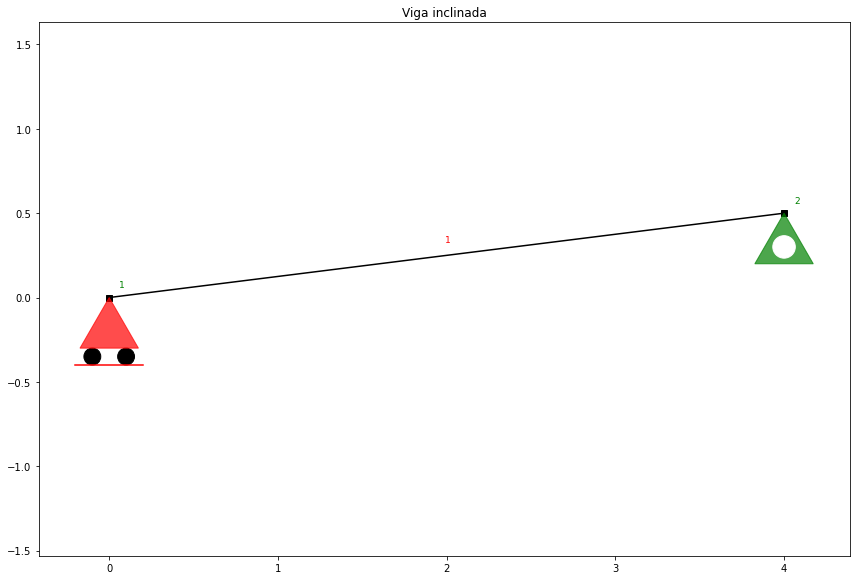

In [10]:
import numpy as np
from anastruct import SystemElements

ss = SystemElements()

Lh = 4.0  # Longitud horizontal
Lv = 0.5 # Longitud vertical
ang_alpha = np.arctan(Lv/Lh) 

# Añadimos elemento barra 1
ss.add_element(location=[[0, 0], [Lh, Lv]])

# Añadimos carrito al nodo 1
ss.add_support_roll(node_id=1, direction=2)

# Añadimos apoyo fijo al nodo 2
ss.add_support_hinged(node_id=2)

# Mostramos estructura generada
ss.show_structure(title='Viga inclinada')

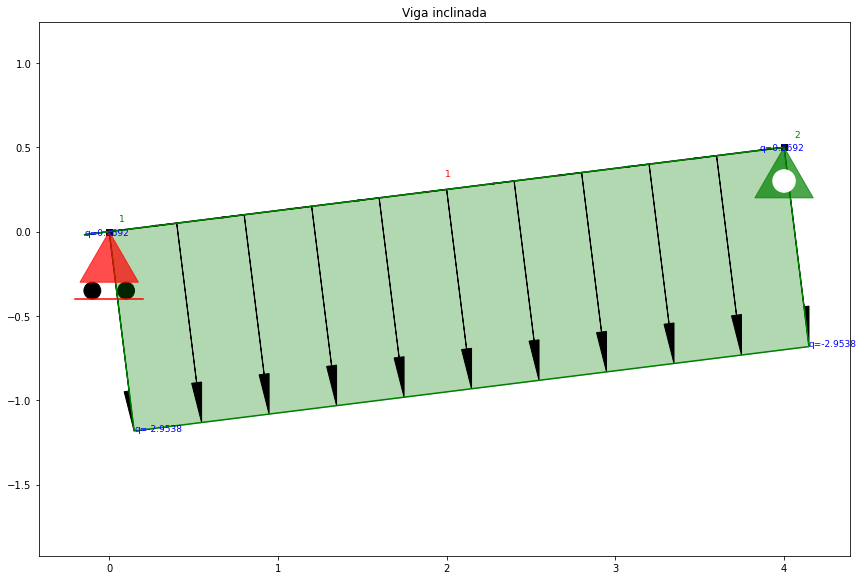

In [11]:

# Añadimos carga distribuida
# En el software informático, únicamente podemos definir cargas perpendiculares a la viga o en el eje de la viga
q = 3.0 # Carga por unidad de longitud horizontal
gper = q*np.cos(ang_alpha)*np.cos(ang_alpha)
qlong = q*np.cos(ang_alpha)*np.sin(ang_alpha)

# En la definición de carga, el término q denota la carga en la dirección transversal al eje de la viga, mientras que el 
# término q_perp denota la carga en la dirección longitudinal de la viga
ss.q_load(element_id=1, q=(gper,gper), q_perp=(qlong,qlong))

# Mostramos estructura generada
ss.show_structure(title='Viga inclinada')

In [12]:
# Resolvemos la estructura
ss.solve()

 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -7.546609646127367e-19   0.0
2  ->  -0.0   0.0


array([-7.54660965e-19,  0.00000000e+00,  1.61245075e-03, -0.00000000e+00,
        0.00000000e+00, -1.61245075e-03])

Reacciones
***************************
*Nodo:  2
Reacción Fy:  6.0
*Nodo:  1
Reacción Fy:  6.0


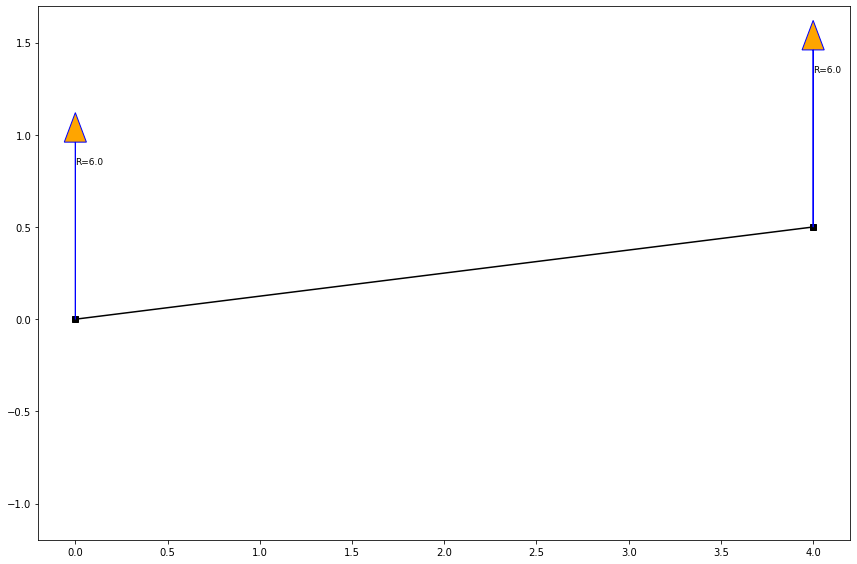

-------------------------------------------


In [18]:
# Mostramos las reacciones
ss.show_reaction_force()

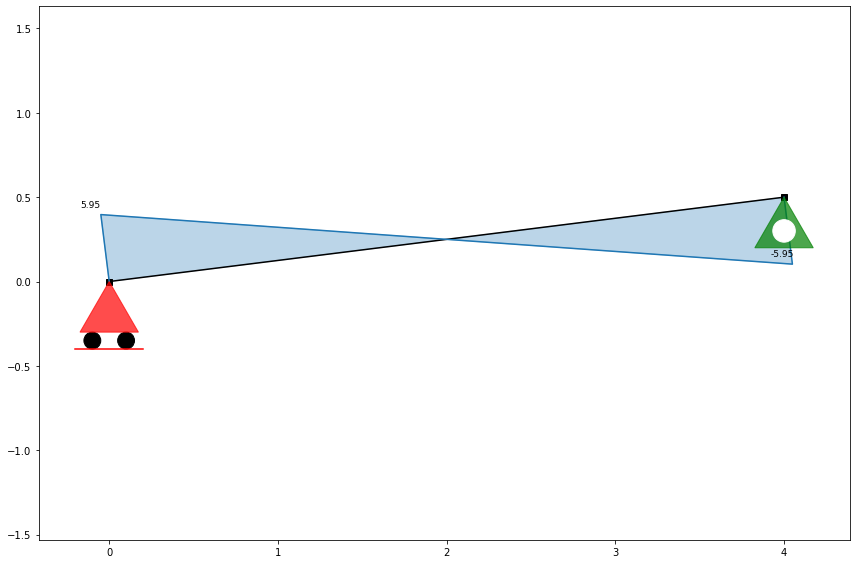

In [14]:
# Mostramos cortantes
ss.show_shear_force()

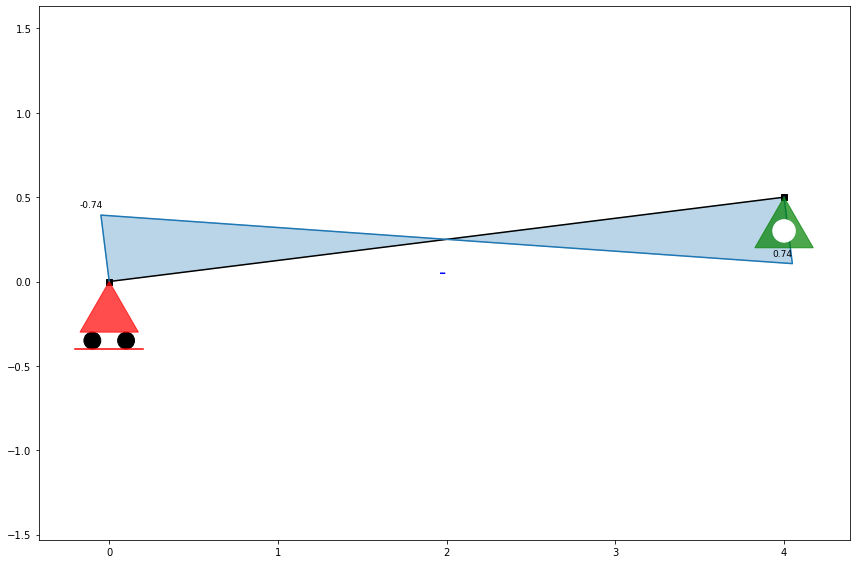

In [19]:
# Mostramos axiles
ss.show_axial_force()

Local maximum bending moment - Beam: 1 Mmax:6.0; Position: (x,y) = (1.878,0.235)


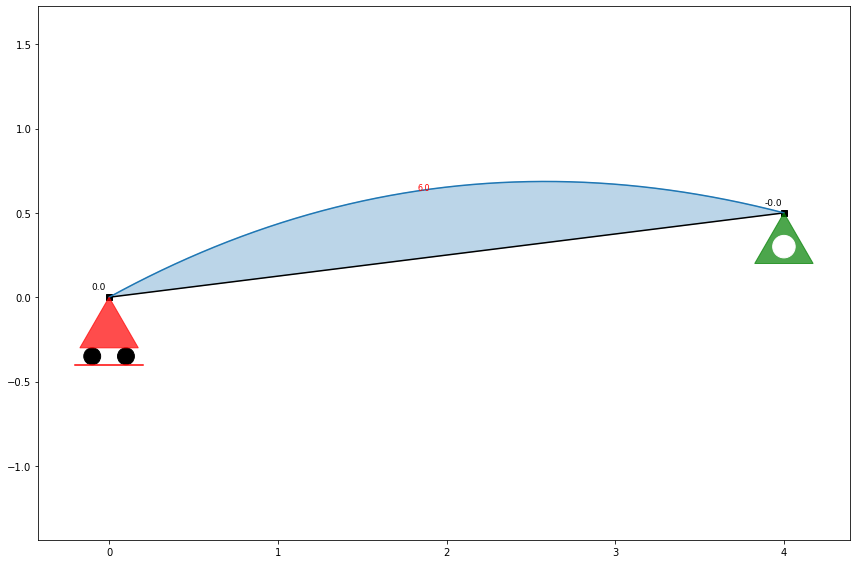

In [15]:
# Mostramos flectores
ss.show_bending_moment()

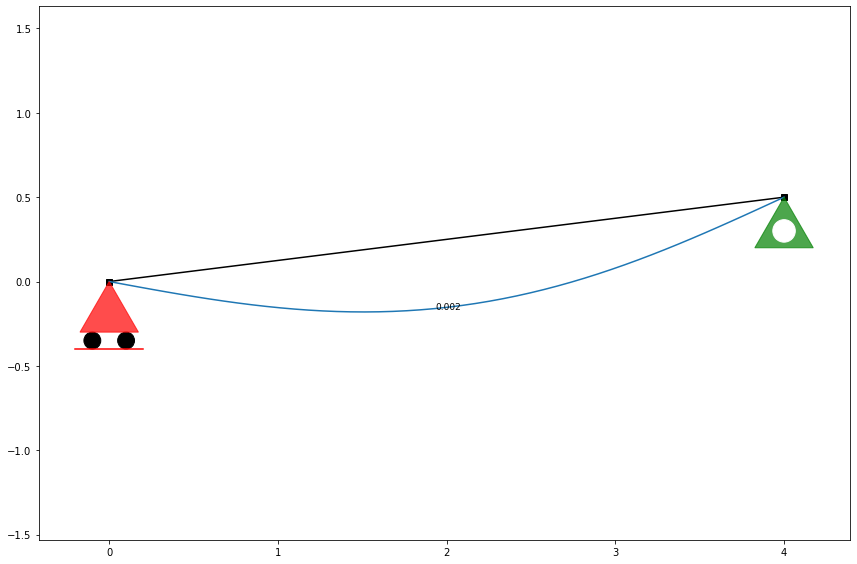

In [16]:
ss.show_displacement()